In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Haberman dataset
df = pd.read_csv('financial_time_series.csv')
df.head(20)


,transaction_id,account_id,date,amount,transaction_type
0,TXN1,ACC1003,2023-01-01 00:00:00,2403.89,Debit
1,TXN2,ACC1001,2023-01-01 01:00:00,3746.97,Credit
2,TXN3,ACC1003,2023-01-01 02:00:00,4371.98,Debit
3,TXN4,ACC1003,2023-01-01 03:00:00,2224.91,Credit
4,TXN5,ACC1001,2023-01-01 04:00:00,313.94,Debit
5,TXN6,ACC1001,2023-01-01 05:00:00,892.20,Debit
6,TXN7,ACC1003,2023-01-01 06:00:00,202.22,Debit
7,TXN8,ACC1002,2023-01-01 07:00:00,3300.99,Credit
8,TXN9,ACC1003,2023-01-01 08:00:00,1728.34,Credit
9,TXN10,ACC1003,2023-01-01 09:00:00,2758.15,Credit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    2000 non-null   object 
 1   account_id        2000 non-null   object 
 2   date              2000 non-null   object 
 3   amount            2000 non-null   float64
 4   transaction_type  2000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 78.3+ KB


In [4]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

In [5]:
df.set_index("date", inplace=True)

In [6]:
# Daily total transaction amount
daily_total = df.resample("D")["amount"].sum()

print(daily_total.head())

date
2023-01-01    58574.71
2023-01-02    63639.09
2023-01-03    52111.96
2023-01-04    55950.05
2023-01-05    51551.93
Freq: D, Name: amount, dtype: float64


In [7]:
# Weekly avg transaction amount
weekly_average = df.resample("W")["amount"].mean()
print(weekly_average.head())

date
2023-01-01    2440.612917
2023-01-08    2566.707619
2023-01-15    2462.666429
2023-01-22    2440.923393
2023-01-29    2515.418988
Freq: W-SUN, Name: amount, dtype: float64


In [22]:
monthly_total = df.resample("ME")["amount"].sum()
monthly_df = monthly_total.reset_index()
monthly_df["Month"] = monthly_df["date"].dt.strftime("%B")
print(monthly_df[["Month", "amount"]])

      Month      amount
0   January  1864589.96
1  February  1721704.56
2     March  1529065.04


C:\Users\aggar\AppData\Local\Temp\ipykernel_4404\3277562486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_df, x="Month", y="amount", palette="coolwarm")


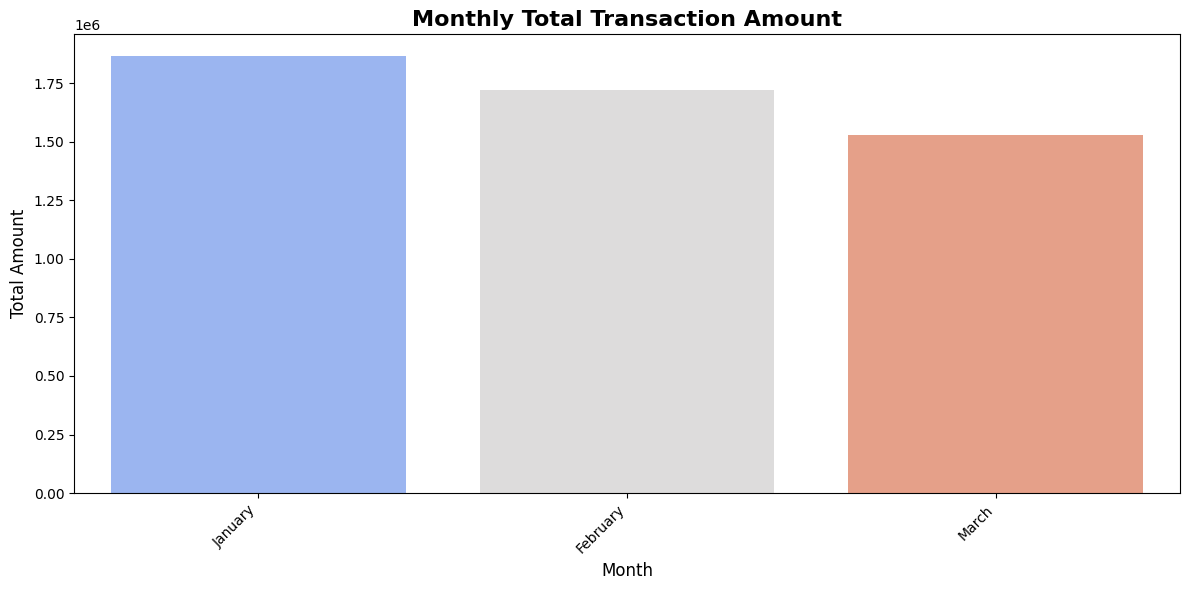

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_df, x="Month", y="amount", palette="coolwarm")
plt.title("Monthly Total Transaction Amount", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Amount", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

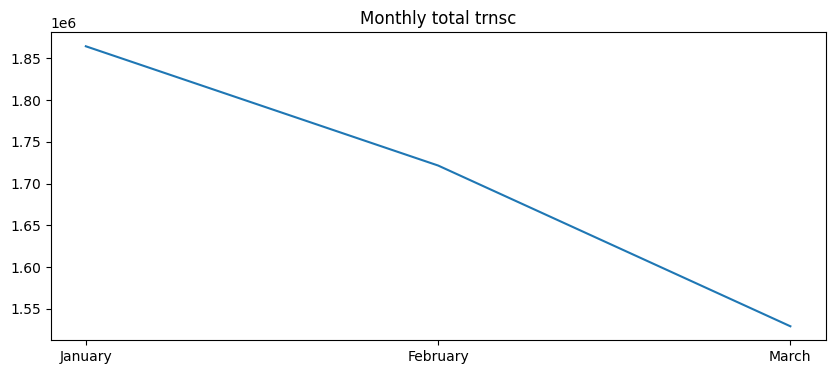

In [39]:
plt.figure(figsize=(10,4))
plt.plot(monthly_df["Month"], monthly_df["amount"])
plt.title("Monthly total trnsc")
plt.show()

In [19]:
weekly_df = weekly_average.reset_index()
weekly_df["Month"] = weekly_df["date"].dt.strftime("%b")
weekly_df["Week"] = ((weekly_df["date"].dt.day - 1)//7)+1

weekly_df["Week_Label"] = (weekly_df["Month"] + " Week" + weekly_df["Week"].astype(str))

print(weekly_df[["Week_Label", "amount"]])

   Week_Label       amount
0   Jan Week1  2440.612917
1   Jan Week2  2566.707619
2   Jan Week3  2462.666429
3   Jan Week4  2440.923393
4   Jan Week5  2515.418988
5   Feb Week1  2549.098274
6   Feb Week2  2526.344048
7   Feb Week3  2577.551071
8   Feb Week4  2604.754167
9   Mar Week1  2785.346726
10  Mar Week2  2437.095119
11  Mar Week3  2644.658571
12  Mar Week4  2611.015859


C:\Users\aggar\AppData\Local\Temp\ipykernel_4404\4116603335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_df, x="Week_Label", y="amount", palette="viridis")


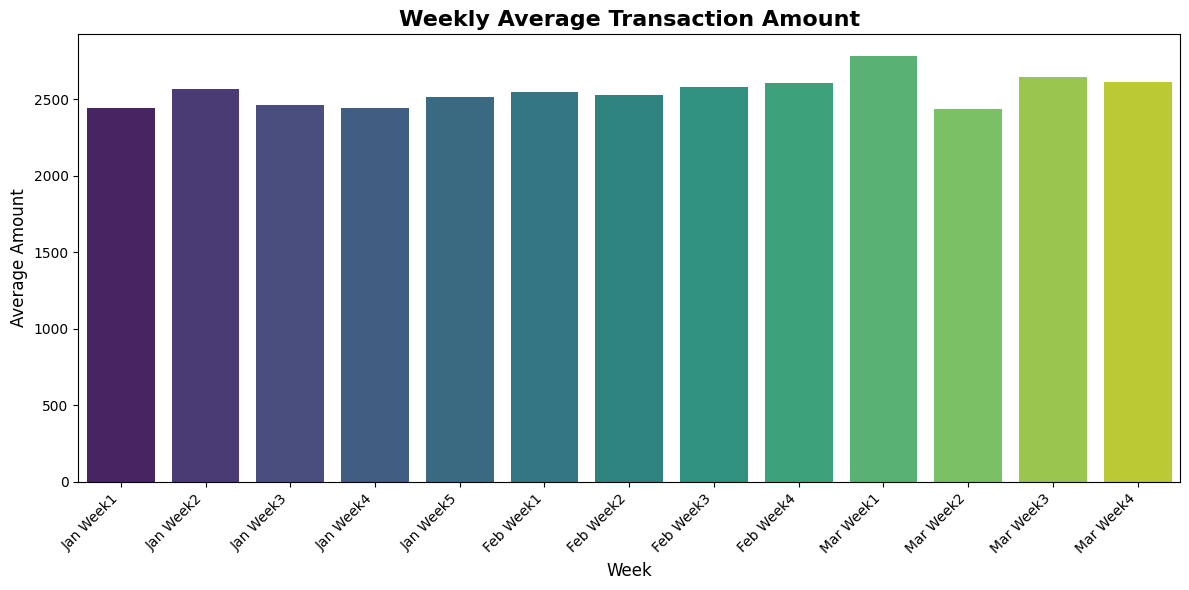

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(data=weekly_df, x="Week_Label", y="amount", palette="viridis")
plt.title("Weekly Average Transaction Amount", fontsize=16, fontweight='bold')
plt.xlabel("Week", fontsize=12)
plt.ylabel("Average Amount", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

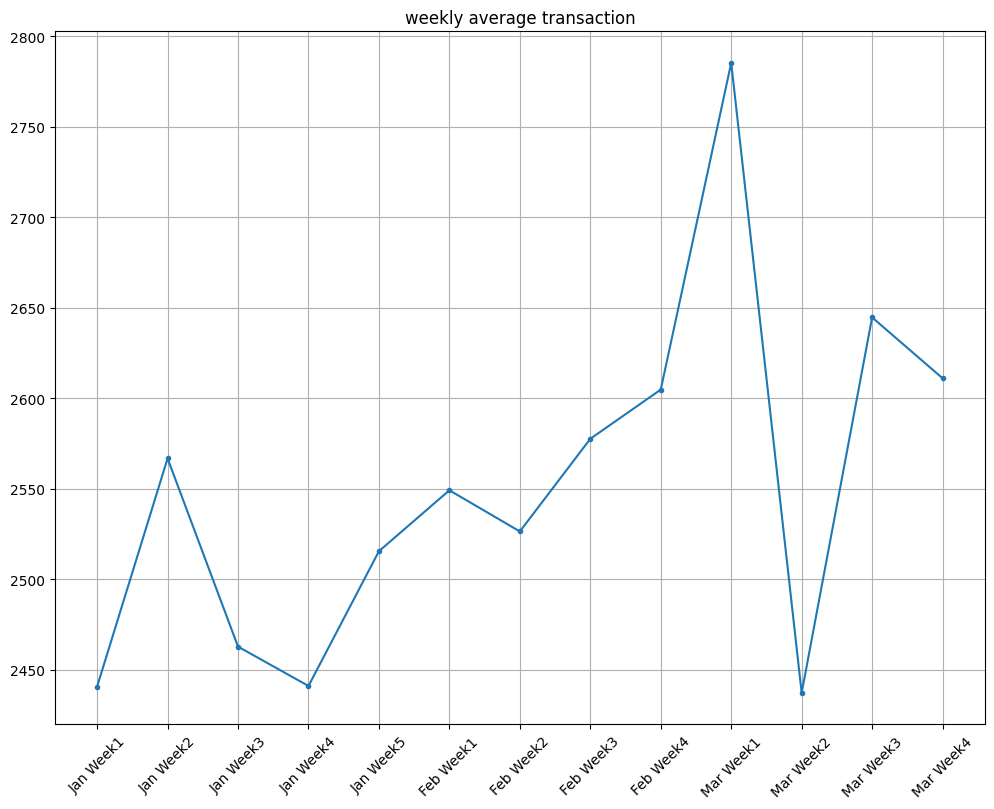

In [38]:
plt.figure(figsize=(12, 9))
plt.plot(weekly_df["Week_Label"], weekly_df["amount"], marker = ".")
plt.title("weekly average transaction")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [32]:
# Check what dates are in the first week and calculate average manually
# jan_1_to_7 = df.loc["2023-01-01":"2023-01-07"]
# print("Transactions from Jan 1-7, 2023:")
# print(jan_1_to_7)
# print(f"\nManual average: {jan_1_to_7['amount'].mean()}")
# print(f"\nWeekly resample first value: {weekly_average.iloc[0]}")